# NNs in Sklearn (Regression)
--------------------
**Dr. Dave Wanik - Operations and Information Management - University of Connecticut**

## Documentation for Regression
Check out the documentation for the MLPRegressor: [link to doucmentation for MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

# Basic NN theory
A neural network is simply a nonlinear weighted sum of inputs and weights. It calculates a feedback signal (acutal - predicted), and uses that to update the weights in a way such that you get a more accurate prediction during the next epoch.

By changing the **activation function** in the last layer, you can tell your model to do classification or regression!



$ReLU(x)=max(0,x)$

If $x<0$ → `output is 0`

If $x≥0$ → `output is x`

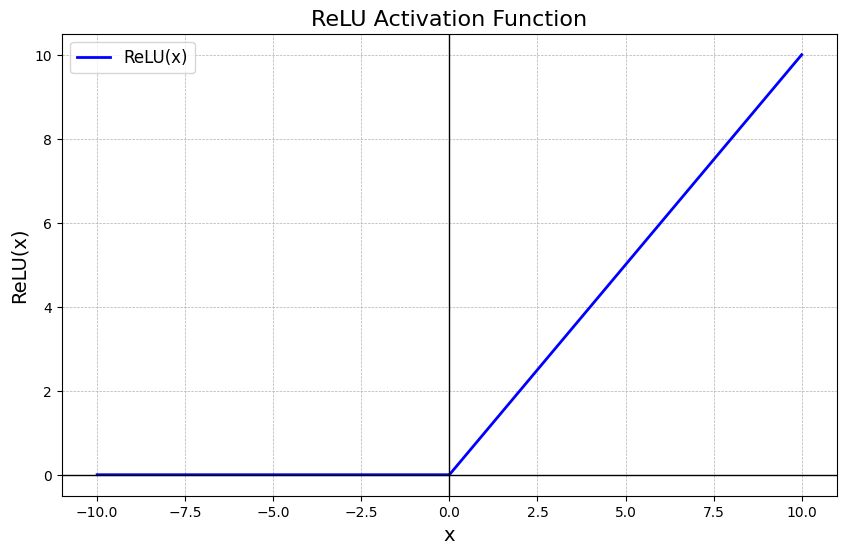

**Figure 1:** example of the relu activation function

# Import Modules

In [ ]:
# Basic Regression Tutorial: California Housing + MLPRegressor (defaults)

import warnings
warnings.filterwarnings("ignore")  # keep output clean; MLP may warn about convergence

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [ ]:
data = fetch_california_housing(as_frame=True)
print(data.DESCR)  # dataset description
X = data.frame.drop(columns=["MedHouseVal"])
y = data.frame["MedHouseVal"]

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Train, val, test split

In [ ]:
# train
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# test and val
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Scale Features
Be careful of `fit_transform()` and `transform()`

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

See what you did...

In [ ]:
X_train_scaled # no column names... oops!

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

# 🔵 Fit the model
It only allows you to specify a single activation function (activation parameter) that is applied to all hidden layers.

## Simple Model

In [ ]:
# 4) Default MLPRegressor (hidden_layer_sizes=(100,), max_iter=200, etc.)
mlp = MLPRegressor(random_state=42,
                   hidden_layer_sizes=(10,5),
                   max_iter=200,
                   batch_size=1000,
                   activation="relu",
                   validation_fraction=0.2,
                   early_stopping=True) # important!
mlp.fit(X_train_scaled, y_train)

MLPRegressor(batch_size=1000, early_stopping=True, hidden_layer_sizes=(10, 5),
             random_state=42, validation_fraction=0.2)

### 🔴 Knobs you can turn

Play with the activation functions.

```python
activation="relu"      # default & best baseline
activation="tanh"      # smoother, symmetric
activation="logistic"  # sigmoid (rarely ideal)
activation="identity"  # turns NN into linear regression
```

How many layers should I use and what are their sizes? I think `size_of_hidden_layer` = `n_columns` OR 2*`n_columns`... don't go  bananas!

How many layers should I use? Just try 1, 2 or 3 to start... less is often more!

```python
hidden_layer_sizes=(50,)
hidden_layer_sizes=(30, 30)
hidden_layer_sizes=(50, 20, 10)
```

Batch size... how many records does it look at per epoch?

```python
batch_size=32     # mini-batch
batch_size=128
batch_size="auto" # default
```

### 🔴 Loss Curve (training only, default for sklearn)

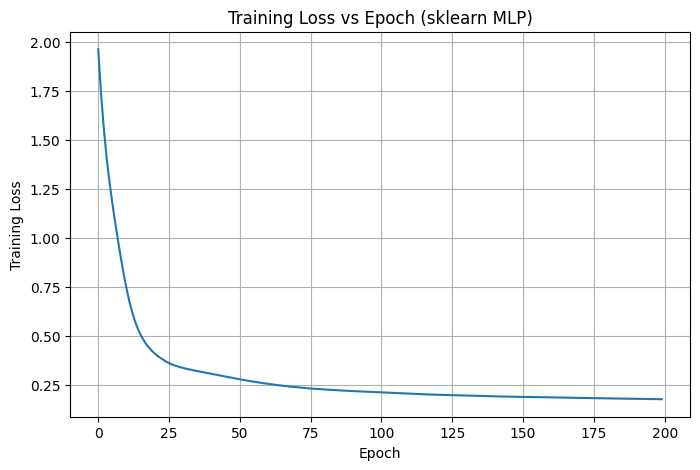

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch (sklearn MLP)")
plt.grid(True)
plt.show()

**Figure 2:** the loss cruve - training loss per epoch. Lower is better.

## Validation curve (only training data)
Informs early stopping.. not like the one in keras!

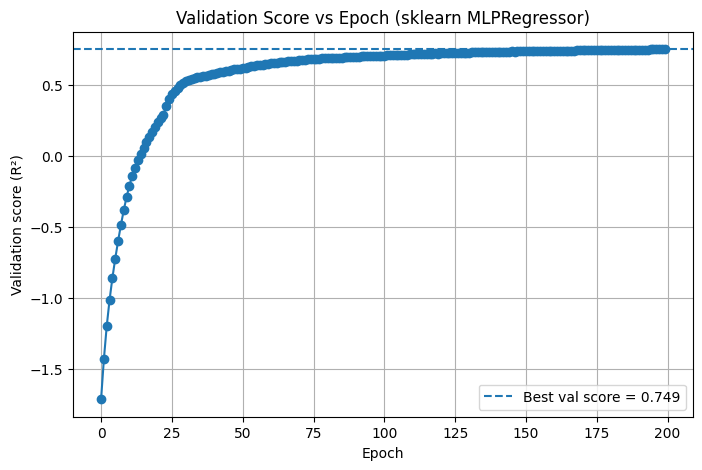

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

val_scores = mlp.validation_scores_

plt.figure(figsize=(8,5))
plt.plot(val_scores, marker="o")
plt.axhline(
    mlp.best_validation_score_,
    linestyle="--",
    label=f"Best val score = {mlp.best_validation_score_:.3f}"
)
plt.xlabel("Epoch")
plt.ylabel("Validation score (R²)")
plt.title("Validation Score vs Epoch (sklearn MLPRegressor)")
plt.legend()
plt.grid(True)
plt.show()


**Figure 3:** a quasi-validation curve... not the same as the one in keras. shows how loss decreases over time (not negative sign convention on y axis.)

# 🔵 See the network
This code is flexible enough to account for any type of network structure!

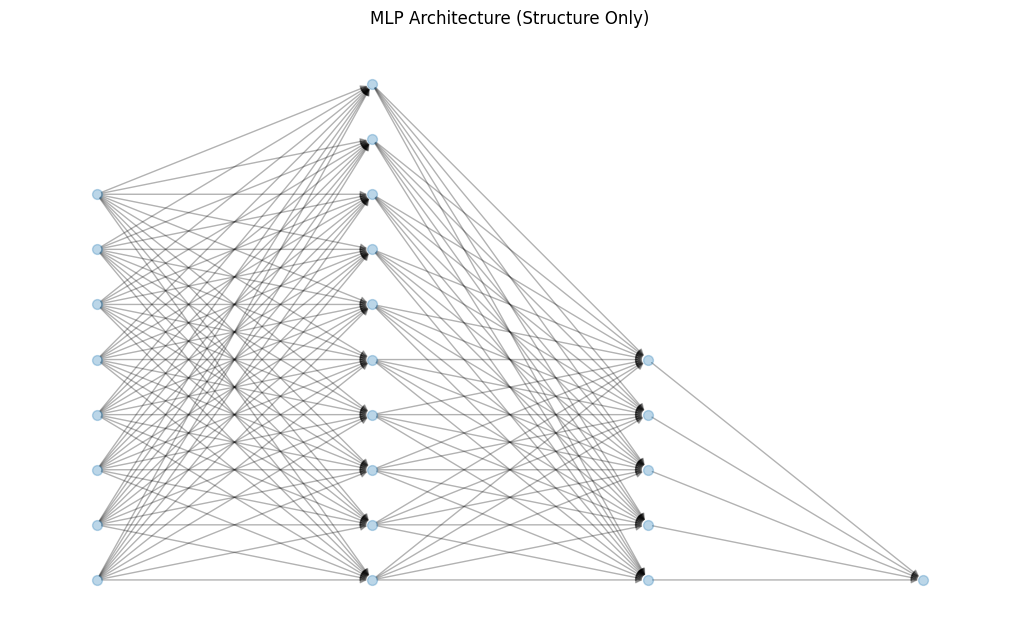

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

layer_sizes = [X.shape[1]] + list(mlp.hidden_layer_sizes) + [1]

G = nx.DiGraph()
node_id = 0
layers = []

for layer_size in layer_sizes:
    layer_nodes = []
    for _ in range(layer_size):
        G.add_node(node_id)
        layer_nodes.append(node_id)
        node_id += 1
    layers.append(layer_nodes)

# Add edges
for l in range(len(layers) - 1):
    for u in layers[l]:
        for v in layers[l + 1]:
            G.add_edge(u, v)

pos = {}
x = 0
for layer in layers:
    y = range(len(layer))
    for node, yi in zip(layer, y):
        pos[node] = (x, yi)
    x += 1

plt.figure(figsize=(10,6))
nx.draw(G, pos, node_size=50, alpha=0.3)
plt.title("MLP Architecture (Structure Only)")
plt.show()


**Figure 4:** the network graph from the fitted neural network with weights (arrow conntections) and input (left), output (right) and hidden layers (in the middle.)

# Predict

In [ ]:
# 5) Predict on all splits
y_pred_train = mlp.predict(X_train_scaled)
y_pred_val   = mlp.predict(X_val_scaled)
y_pred_test  = mlp.predict(X_test_scaled)

# A function to define metrics
Can you see how this can be used for classification?

In [ ]:
# 6) Metrics helper
def metrics_row(name, y_true, y_pred):
    return {
        "split": name,
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
    }

metrics_df = pd.DataFrame([
    metrics_row("train", y_train, y_pred_train),
    metrics_row("val",   y_val,   y_pred_val),
    metrics_row("test",  y_test,  y_pred_test),
])

print("=== Metrics (defaults) ===")
print(metrics_df.to_string(index=False))

=== Metrics (defaults) ===
split       R2      MAE     MAPE
train 0.737495 0.420831 0.235665
  val 0.717804 0.428180 0.245408
 test 0.724638 0.425695 0.239628


# Scatterplots

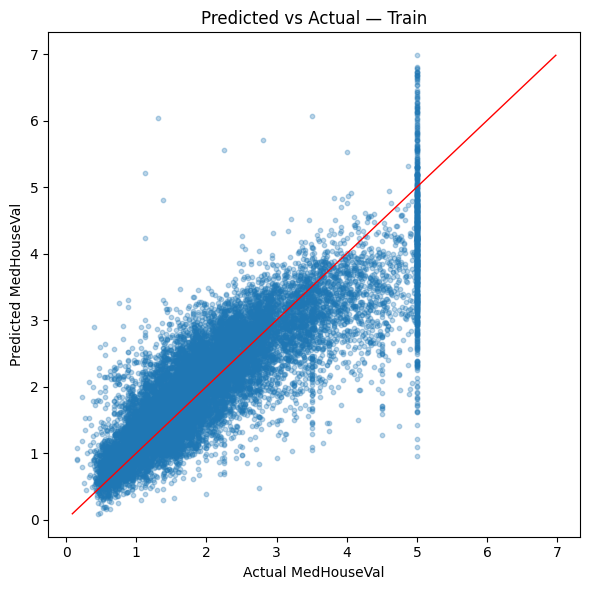

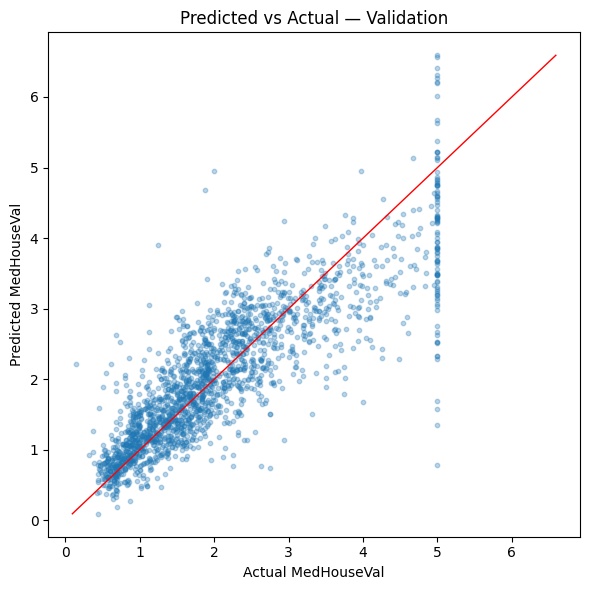

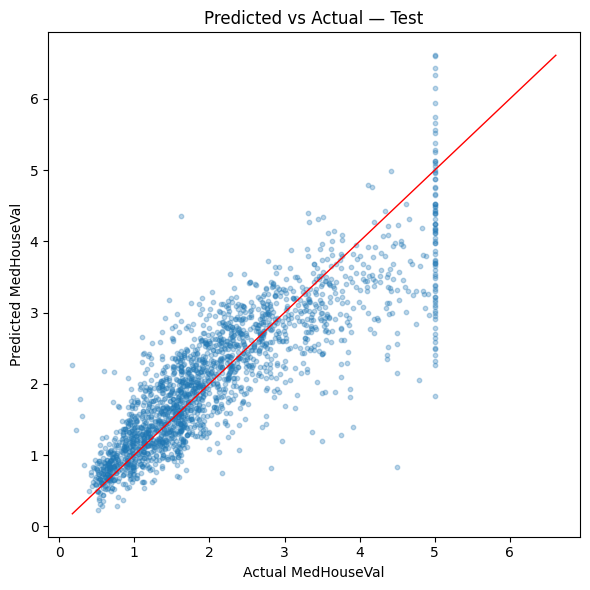

In [ ]:
# 7) Scatterplots: predicted vs actual (one figure per split; y=x reference line)
def scatter_with_reference(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.3, s=10)
    lo = min(np.min(y_true), np.min(y_pred))
    hi = max(np.max(y_true), np.max(y_pred))
    plt.plot([lo, hi], [lo, hi], linewidth=1, color='red')  # reference line
    plt.xlabel("Actual MedHouseVal")
    plt.ylabel("Predicted MedHouseVal")
    plt.title(title)
    plt.tight_layout()
    plt.show()

scatter_with_reference(y_train, y_pred_train, "Predicted vs Actual — Train")
scatter_with_reference(y_val,   y_pred_val,   "Predicted vs Actual — Validation")
scatter_with_reference(y_test,  y_pred_test,  "Predicted vs Actual — Test")

**Figure 5:** Scatterplots of actual vs. predicted by train, val and test partition (top, middle, bottom)

# 🔵 xAI - what did my model learn?

In [ ]:
mlp.coefs_      # list of weight matrices
mlp.intercepts_  # list of bias vectors


[array([ 0.44394593,  0.16434948,  0.23019277, -0.33747131, -0.33063695,
        -0.01370783,  0.24327435,  0.39892579,  0.20528366, -0.14733353]),
 array([ 0.6707857 , -0.11168746,  0.3510006 , -0.30738065, -0.25304564]),
 array([0.99178508])]

In [ ]:
for i, w in enumerate(mlp.coefs_):
    print(f"Layer {i} → {i+1} weights shape:", w.shape)


Layer 0 → 1 weights shape: (8, 10)
Layer 1 → 2 weights shape: (10, 5)
Layer 2 → 3 weights shape: (5, 1)


## Visualizing the weights

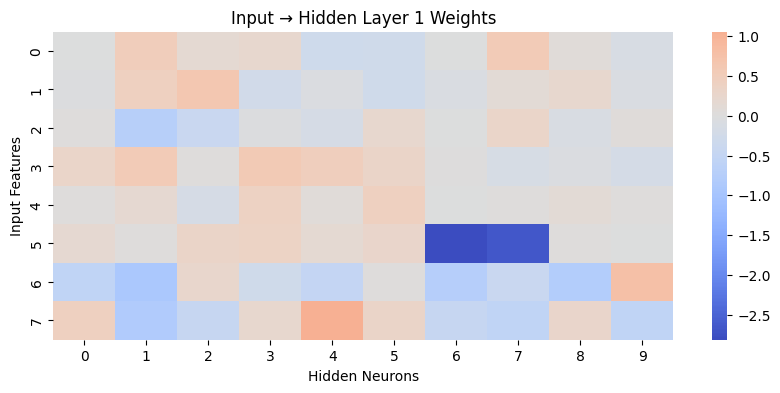

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# First hidden layer weights
W0 = mlp.coefs_[0]

plt.figure(figsize=(10,4))
sns.heatmap(W0, cmap="coolwarm", center=0)
plt.title("Input → Hidden Layer 1 Weights")
plt.xlabel("Hidden Neurons")
plt.ylabel("Input Features")
plt.show()


**Figure 6:** A learned series of weights between two layers.

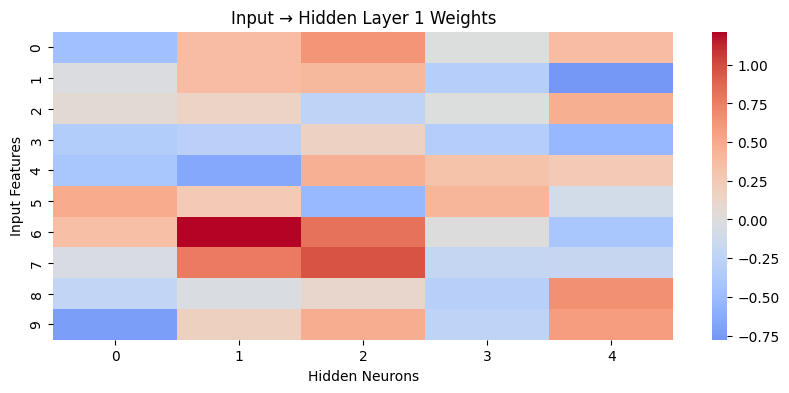

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Next hidden layer weights
W1 = mlp.coefs_[1]

plt.figure(figsize=(10,4))
sns.heatmap(W1, cmap="coolwarm", center=0)
plt.title("Input → Hidden Layer 1 Weights")
plt.xlabel("Hidden Neurons")
plt.ylabel("Input Features")
plt.show()


**Figure 7:** A learned series of weights between two layers.

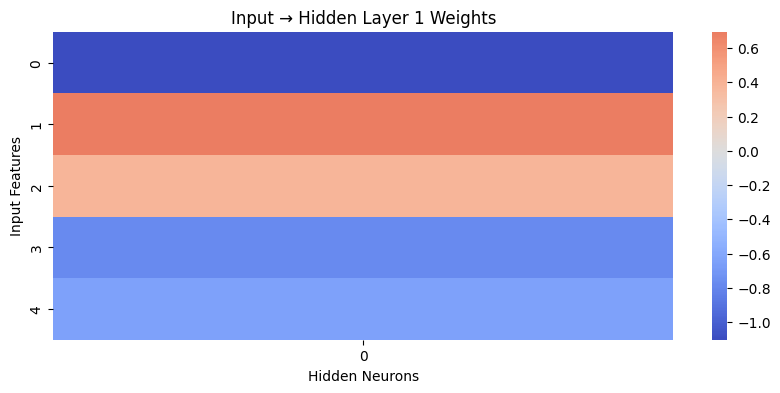

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Final hidden layer weights
W2 = mlp.coefs_[2]

plt.figure(figsize=(10,4))
sns.heatmap(W2, cmap="coolwarm", center=0)
plt.title("Input → Hidden Layer 1 Weights")
plt.xlabel("Hidden Neurons")
plt.ylabel("Input Features")
plt.show()


**Figure 8:** A learned series of weights between two layers.